# 🌲 Random Forest - Ensemble Learning with Bagging

**Module 03: Ensemble Learning Algorithms**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Ensemble Learning** - Why combining models beats single models
2. **Bagging (Bootstrap Aggregating)** - Reduce variance through averaging
3. **Random Forest Architecture** - Forest of randomized decision trees
4. **Feature Randomness** - Why random feature selection helps
5. **Out-of-Bag (OOB) Evaluation** - Free validation without holdout set
6. **Feature Importance** - Discover which features matter most
7. **Hyperparameter Tuning** - Optimize n_estimators, max_depth, max_features

## 📚 Section 1: Theoretical Foundation

### What is Ensemble Learning?

**Core Idea:** Combine multiple weak learners to create a strong learner

**Analogy:**
```
Single Expert (Decision Tree):        Committee of Experts (Random Forest):
  One person's opinion                  Average of many opinions
  Can be biased/wrong                   Errors cancel out
  High variance                         Low variance
```

**Mathematical Principle:**
```
Prediction = Average(Tree₁, Tree₂, ..., Treeₙ)

For classification: Majority vote
For regression: Mean prediction
```

---

### 🎯 The Wisdom of Crowds

**Why Ensemble Works:**

**Example: 100 coin flips**
```
Single coin: 50% chance heads

Majority vote of 100 coins:
Probability all agree on wrong answer ≈ 0 (extremely low)
Ensemble dramatically reduces error!
```

**Conditions for Success:**
1. **Diverse models** (make different errors)
2. **Better than random** (each model > 50% accuracy)
3. **Independent errors** (uncorrelated mistakes)

---

### 🌳 From Single Tree to Forest

**Single Decision Tree Problems:**
```
✗ High variance (sensitive to data changes)
✗ Overfitting (memorizes training data)
✗ Unstable (small data change → different tree)
✗ Greedy splits (local optimum)
```

**Random Forest Solution:**
```
✓ Low variance (averaging reduces)
✓ Robust (less overfitting)
✓ Stable (consensus of many trees)
✓ Better generalization
```

**Visual:**
```
Single Tree:                Random Forest:

    Root                    Tree₁  Tree₂  Tree₃ ... Tree₁₀₀
   /    \                     ↓      ↓      ↓        ↓
 Left  Right                  pred₁  pred₂  pred₃   pred₁₀₀
  /\     /\                          ↓
Leaves Leaves                    Average/Vote
                                      ↓
Unstable, Overfits            Final Prediction
```

---

### 🎲 Bagging (Bootstrap Aggregating)

**Step-by-Step Process:**

**1. Bootstrap Sampling (with replacement)**
```
Original data: [1, 2, 3, 4, 5]

Sample 1: [1, 1, 3, 4, 5]  ← '1' appears twice
Sample 2: [2, 2, 3, 4, 4]  ← '2' and '4' repeated
Sample 3: [1, 3, 3, 5, 5]  ← '3' and '5' repeated

Each sample: same size, but different due to replacement
```

**2. Train Tree on Each Sample**
```
Sample 1 → Tree₁
Sample 2 → Tree₂
Sample 3 → Tree₃
...
Sample n → Treeₙ
```

**3. Aggregate Predictions**
```
Classification: Majority Vote
Tree₁: Class A
Tree₂: Class A    Majority Vote → Prediction: Class A
Tree₃: Class B
Tree₄: Class A

Regression: Average
Tree₁: 10.5
Tree₂: 11.2     Average → Prediction: 10.9
Tree₃: 10.8
Tree₄: 11.0
```

**Why Bagging Reduces Variance:**
```
Var(Average) = Var(Tree) / n

With 100 trees: Variance reduced by ~10x!
```

---

### 🎲 Random Feature Selection

**Problem:** Even with bootstrap, trees can be similar (correlated)

**Solution:** At each split, consider only random subset of features

**Example:**
```
Total features: 30

Single Tree:
  Each split considers: ALL 30 features
  Result: Trees look similar (correlated)

Random Forest:
  Each split considers: √30 ≈ 5 random features
  Result: Trees are diverse (decorrelated)
```

**Impact:**
- Forces trees to use different features
- Gives "weak" features a chance
- Discovers alternative patterns
- Further reduces correlation between trees

**Parameter: max_features**
```
Classification default: √n_features
Regression default: n_features / 3

Examples (30 features):
• max_features='sqrt': 5-6 features per split
• max_features='log2': 5 features per split
• max_features=10: 10 features per split
• max_features=None: All 30 features (no randomness)
```

---

### 📊 Out-of-Bag (OOB) Evaluation

**Key Insight:** Bootstrap sampling leaves ~37% of data unused per tree

**Out-of-Bag Sample:**
```
Training data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Tree₁ trained on: [1, 1, 3, 4, 6, 7, 9, 9, 10]
OOB for Tree₁:    [2, 5, 8]  ← Not used in training

Tree₂ trained on: [2, 3, 3, 4, 5, 6, 8, 8, 10]
OOB for Tree₂:    [1, 7, 9]  ← Not used in training
```

**OOB Prediction:**
```
For sample X:
1. Find all trees that didn't use X in training
2. Average their predictions
3. Compare to true label

OOB Score = Accuracy across all OOB predictions
```

**Benefits:**
- **Free validation** - No need for separate validation set
- **Unbiased estimate** - Each sample predicted by trees that haven't seen it
- **More training data** - Can use full dataset for training

---

### 🎛️ Key Hyperparameters

| **Parameter** | **Effect** | **Typical Values** | **Impact** |
|--------------|-----------|-------------------|-----------|
| **n_estimators** | Number of trees | 100-500 | More trees = better (diminishing returns) |
| **max_depth** | Tree depth limit | None, 10-30 | Controls overfitting |
| **max_features** | Features per split | 'sqrt', 'log2', int | Controls diversity |
| **min_samples_split** | Min samples to split | 2-20 | Prevents overfitting |
| **min_samples_leaf** | Min samples per leaf | 1-10 | Smooths predictions |
| **bootstrap** | Use bootstrap sampling | True (default) | False = no bagging |
| **oob_score** | Calculate OOB score | False (default) | True = free validation |
| **n_jobs** | Parallel processing | -1 (all cores) | Speeds up training |

---

### 📊 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| Excellent accuracy (often best) | Less interpretable than single tree |
| Robust to overfitting | Slower than single tree |
| Handles non-linear relationships | Large memory (stores all trees) |
| Works with missing values | Biased toward dominant classes |
| Automatic feature importance | Can't extrapolate |
| No feature scaling needed | Slower predictions (all trees) |
| Parallel training (fast) | Black box model |
| OOB evaluation built-in | Large file size when saved |

---

### 🎯 When to Use Random Forest?

| **Use Random Forest When** | **Avoid When** |
|---------------------------|---------------|
| Need high accuracy | Need interpretability |
| Non-linear relationships | Need fast predictions |
| Many features (100-1000s) | Very large datasets (>1M) |
| Mixed feature types | Need probability calibration |
| Imbalanced classes (with class_weight) | Linear relationships (use linear model) |
| Want feature importance | Memory constrained |
| Need robust baseline | Need online learning |

In [3]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    mean_squared_error, r2_score
)
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Classification: Breast Cancer Dataset

In [6]:
# Load Breast Cancer Dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print("📊 Breast Cancer Dataset (Classification)")
print(f"Shape: {df_cancer.shape}")
print(f"Features: {len(cancer.feature_names)}")
print(f"Classes: {cancer.target_names.tolist()}")
print(f"\nClass Distribution:")
print(df_cancer['target'].value_counts())
print("\n" + "="*70)
print(df_cancer.head())

📊 Breast Cancer Dataset (Classification)
Shape: (569, 31)
Features: 30
Classes: ['malignant', 'benign']

Class Distribution:
target
1    357
0    212
Name: count, dtype: int64

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0

In [8]:
# Split data
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

print(f"\n✂️ Data Split:")
print(f"Training: {X_train_c.shape[0]} samples")
print(f"Testing: {X_test_c.shape[0]} samples")
print(f"Features: {X_train_c.shape[1]}")

print("\n💡 Note: Random Forest doesn't require feature scaling!")


✂️ Data Split:
Training: 455 samples
Testing: 114 samples
Features: 30

💡 Note: Random Forest doesn't require feature scaling!


### 2.2 Regression: California Housing Dataset

In [11]:
# Load California Housing Dataset
housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

# Use subset for faster computation
np.random.seed(42)
sample_indices = np.random.choice(df_housing.index, size=5000, replace=False)
df_housing_sample = df_housing.loc[sample_indices].reset_index(drop=True)

print("\n📊 California Housing Dataset (Regression)")
print(f"Original shape: {df_housing.shape}")
print(f"Sampled shape: {df_housing_sample.shape}")
print(f"Features: {list(housing.feature_names)}")


📊 California Housing Dataset (Regression)
Original shape: (20640, 9)
Sampled shape: (5000, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [13]:
# Split housing data
X_housing = df_housing_sample.drop('MedHouseVal', axis=1)
y_housing = df_housing_sample['MedHouseVal']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

print(f"\n✂️ Housing Data Split:")
print(f"Training: {X_train_h.shape[0]} samples")
print(f"Testing: {X_test_h.shape[0]} samples")


✂️ Housing Data Split:
Training: 4000 samples
Testing: 1000 samples


## 🧪 Section 3: Single Tree vs Random Forest

### 3.1 Training Single Decision Tree (Baseline)

In [17]:
# Train single decision tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_c, y_train_c)

# Predictions
y_pred_dt = dt_classifier.predict(X_test_c)

# Evaluate
dt_train_acc = dt_classifier.score(X_train_c, y_train_c)
dt_test_acc = accuracy_score(y_test_c, y_pred_dt)

print("📊 Single Decision Tree Performance:")
print(f"Training Accuracy: {dt_train_acc:.4f}")
print(f"Testing Accuracy:  {dt_test_acc:.4f}")
print(f"Gap (Overfitting): {dt_train_acc - dt_test_acc:.4f}")
print(f"Tree Depth:        {dt_classifier.get_depth()}")
print(f"Number of Leaves:  {dt_classifier.get_n_leaves()}")

📊 Single Decision Tree Performance:
Training Accuracy: 1.0000
Testing Accuracy:  0.9123
Gap (Overfitting): 0.0877
Tree Depth:        7
Number of Leaves:  19


### 3.2 Training Random Forest (100 trees)

In [20]:
# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_c, y_train_c)

# Predictions
y_pred_rf = rf_classifier.predict(X_test_c)

# Evaluate
rf_train_acc = rf_classifier.score(X_train_c, y_train_c)
rf_test_acc = accuracy_score(y_test_c, y_pred_rf)

print("\n📊 Random Forest Performance (100 trees):")
print(f"Training Accuracy: {rf_train_acc:.4f}")
print(f"Testing Accuracy:  {rf_test_acc:.4f}")
print(f"Gap (Overfitting): {rf_train_acc - rf_test_acc:.4f}")
print(f"Number of Trees:   {rf_classifier.n_estimators}")


📊 Random Forest Performance (100 trees):
Training Accuracy: 1.0000
Testing Accuracy:  0.9561
Gap (Overfitting): 0.0439
Number of Trees:   100


### 3.3 Comparison: Single Tree vs Forest

In [23]:
# Create comparison
comparison = pd.DataFrame({
    'Model': ['Single Decision Tree', 'Random Forest (100 trees)'],
    'Train Accuracy': [dt_train_acc, rf_train_acc],
    'Test Accuracy': [dt_test_acc, rf_test_acc],
    'Overfitting Gap': [dt_train_acc - dt_test_acc, rf_train_acc - rf_test_acc],
    'Complexity': [f'{dt_classifier.get_n_leaves()} leaves', '100 trees']
})

print("\n📊 COMPARISON: Single Tree vs Random Forest")
print("="*70)
print(comparison.to_string(index=False))


📊 COMPARISON: Single Tree vs Random Forest
                    Model  Train Accuracy  Test Accuracy  Overfitting Gap Complexity
     Single Decision Tree             1.0       0.912281         0.087719  19 leaves
Random Forest (100 trees)             1.0       0.956140         0.043860  100 trees


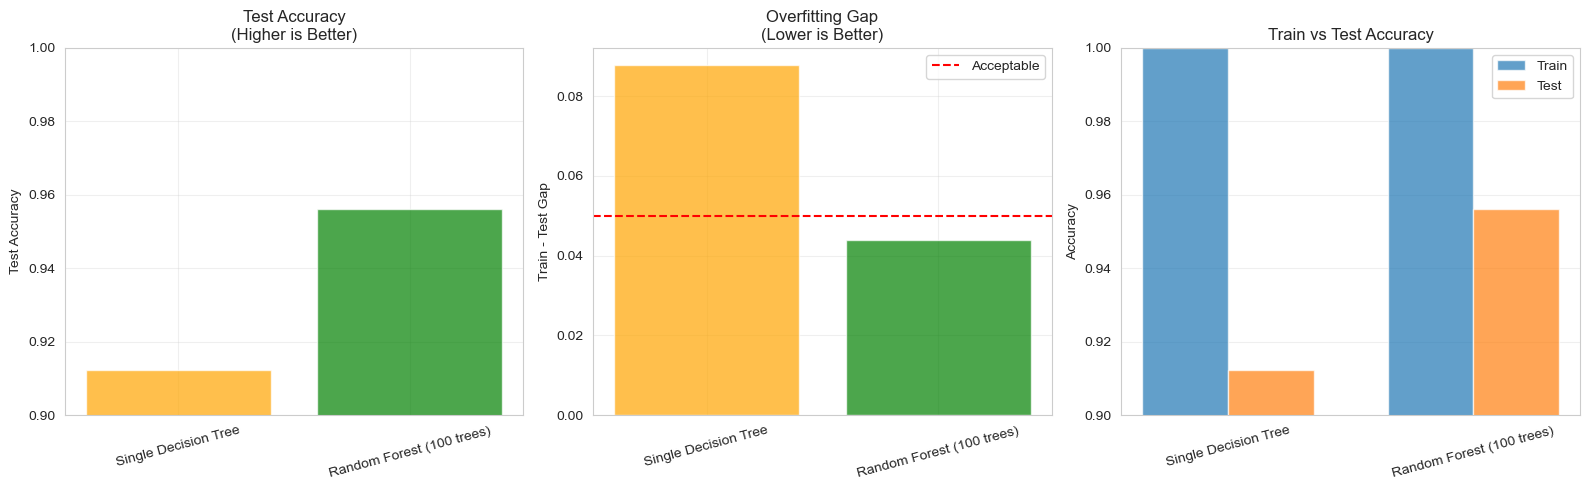


💡 Key Observations:
  • Random Forest reduces overfitting significantly
  • Better generalization (smaller train-test gap)
  • Higher test accuracy despite lower training accuracy


In [25]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = comparison['Model']
colors = ['orange', 'green']

# Test Accuracy
axes[0].bar(models, comparison['Test Accuracy'], alpha=0.7, color=colors)
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('Test Accuracy\n(Higher is Better)')
axes[0].set_ylim([0.9, 1.0])
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3)

# Overfitting Gap
axes[1].bar(models, comparison['Overfitting Gap'], alpha=0.7, color=colors)
axes[1].set_ylabel('Train - Test Gap')
axes[1].set_title('Overfitting Gap\n(Lower is Better)')
axes[1].axhline(y=0.05, color='red', linestyle='--', label='Acceptable')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3)

# Training vs Testing
x = np.arange(len(models))
width = 0.35
axes[2].bar(x - width/2, comparison['Train Accuracy'], width, label='Train', alpha=0.7)
axes[2].bar(x + width/2, comparison['Test Accuracy'], width, label='Test', alpha=0.7)
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Train vs Test Accuracy')
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=15)
axes[2].set_ylim([0.9, 1.0])
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Observations:")
print("  • Random Forest reduces overfitting significantly")
print("  • Better generalization (smaller train-test gap)")
print("  • Higher test accuracy despite lower training accuracy")

## 📊 Section 4: Impact of Number of Trees

### 4.1 Testing Different n_estimators

In [29]:
# Test different numbers of trees
n_estimators_range = [1, 5, 10, 25, 50, 100, 200, 300, 500]
train_scores_trees = []
test_scores_trees = []
oob_scores_trees = []

print("\n🔍 Testing different numbers of trees:")
print("="*70)

for n_est in n_estimators_range:
    rf_temp = RandomForestClassifier(n_estimators=n_est, oob_score=True, 
                                     random_state=42, n_jobs=-1)
    rf_temp.fit(X_train_c, y_train_c)
    
    train_scores_trees.append(rf_temp.score(X_train_c, y_train_c))
    test_scores_trees.append(rf_temp.score(X_test_c, y_test_c))
    oob_scores_trees.append(rf_temp.oob_score_)
    
    print(f"Trees: {n_est:>3} → Train: {train_scores_trees[-1]:.4f} | Test: {test_scores_trees[-1]:.4f} | OOB: {oob_scores_trees[-1]:.4f}")


🔍 Testing different numbers of trees:
Trees:   1 → Train: 0.9714 | Test: 0.9474 | OOB: 0.5604
Trees:   5 → Train: 0.9912 | Test: 0.9386 | OOB: 0.8901
Trees:  10 → Train: 0.9956 | Test: 0.9386 | OOB: 0.9363
Trees:  25 → Train: 1.0000 | Test: 0.9561 | OOB: 0.9473
Trees:  50 → Train: 1.0000 | Test: 0.9561 | OOB: 0.9451
Trees: 100 → Train: 1.0000 | Test: 0.9561 | OOB: 0.9538
Trees: 200 → Train: 1.0000 | Test: 0.9561 | OOB: 0.9604
Trees: 300 → Train: 1.0000 | Test: 0.9474 | OOB: 0.9560
Trees: 500 → Train: 1.0000 | Test: 0.9561 | OOB: 0.9604


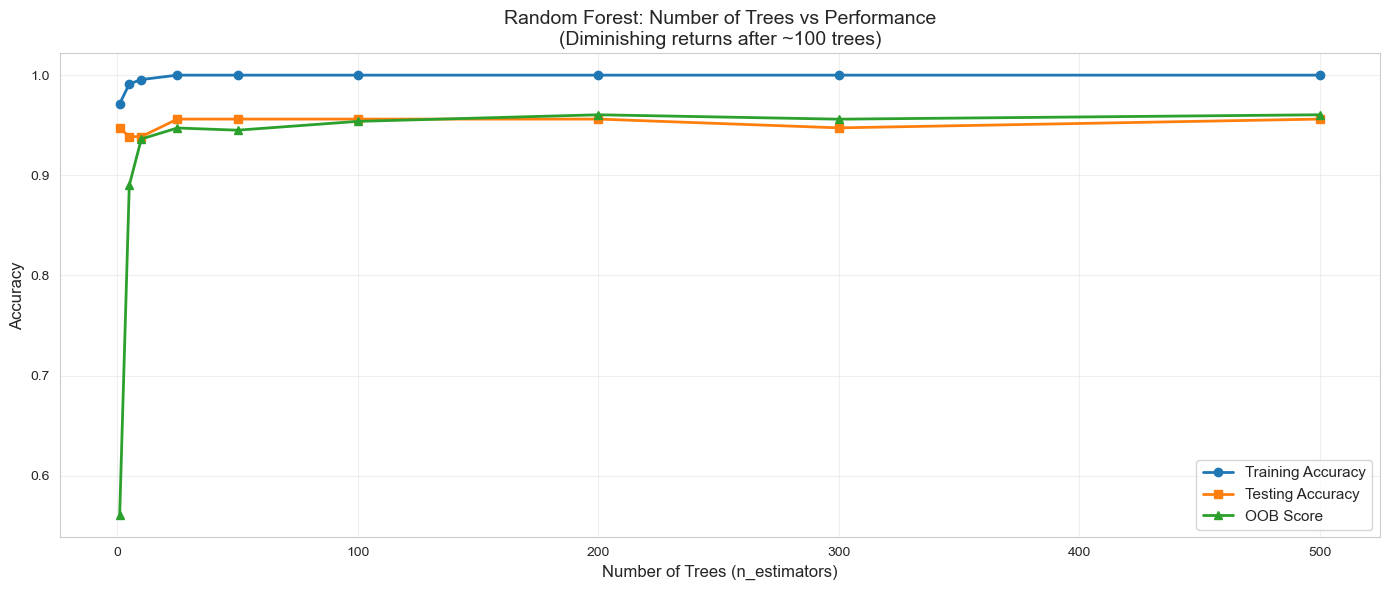


💡 Observations:
  • Single tree (n=1): 0.9474 accuracy
  • 100 trees: 0.9561 accuracy
  • 500 trees: 0.9561 accuracy
  • Improvement slows after 100-200 trees (diminishing returns)
  • OOB score tracks test score well (free validation!)


In [31]:
# Plot n_estimators vs performance
plt.figure(figsize=(14, 6))

plt.plot(n_estimators_range, train_scores_trees, label='Training Accuracy', 
         marker='o', linewidth=2, markersize=6)
plt.plot(n_estimators_range, test_scores_trees, label='Testing Accuracy', 
         marker='s', linewidth=2, markersize=6)
plt.plot(n_estimators_range, oob_scores_trees, label='OOB Score', 
         marker='^', linewidth=2, markersize=6)

plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest: Number of Trees vs Performance\n(Diminishing returns after ~100 trees)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print(f"  • Single tree (n=1): {test_scores_trees[0]:.4f} accuracy")
print(f"  • 100 trees: {test_scores_trees[5]:.4f} accuracy")
print(f"  • 500 trees: {test_scores_trees[-1]:.4f} accuracy")
print("  • Improvement slows after 100-200 trees (diminishing returns)")
print("  • OOB score tracks test score well (free validation!)")

## 📊 Section 5: Feature Importance

### 5.1 Extracting Feature Importance

In [35]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Top 15 Most Important Features:")
print("="*70)
print(feature_importance.head(15).to_string(index=False))


📊 Top 15 Most Important Features:
             Feature  Importance
          worst area    0.140016
worst concave points    0.129530
        worst radius    0.097696
 mean concave points    0.090885
     worst perimeter    0.072226
      mean perimeter    0.069574
         mean radius    0.068676
      mean concavity    0.057638
           mean area    0.049172
     worst concavity    0.034340
          area error    0.033104
   worst compactness    0.018600
       worst texture    0.018597
        radius error    0.016770
    worst smoothness    0.012436


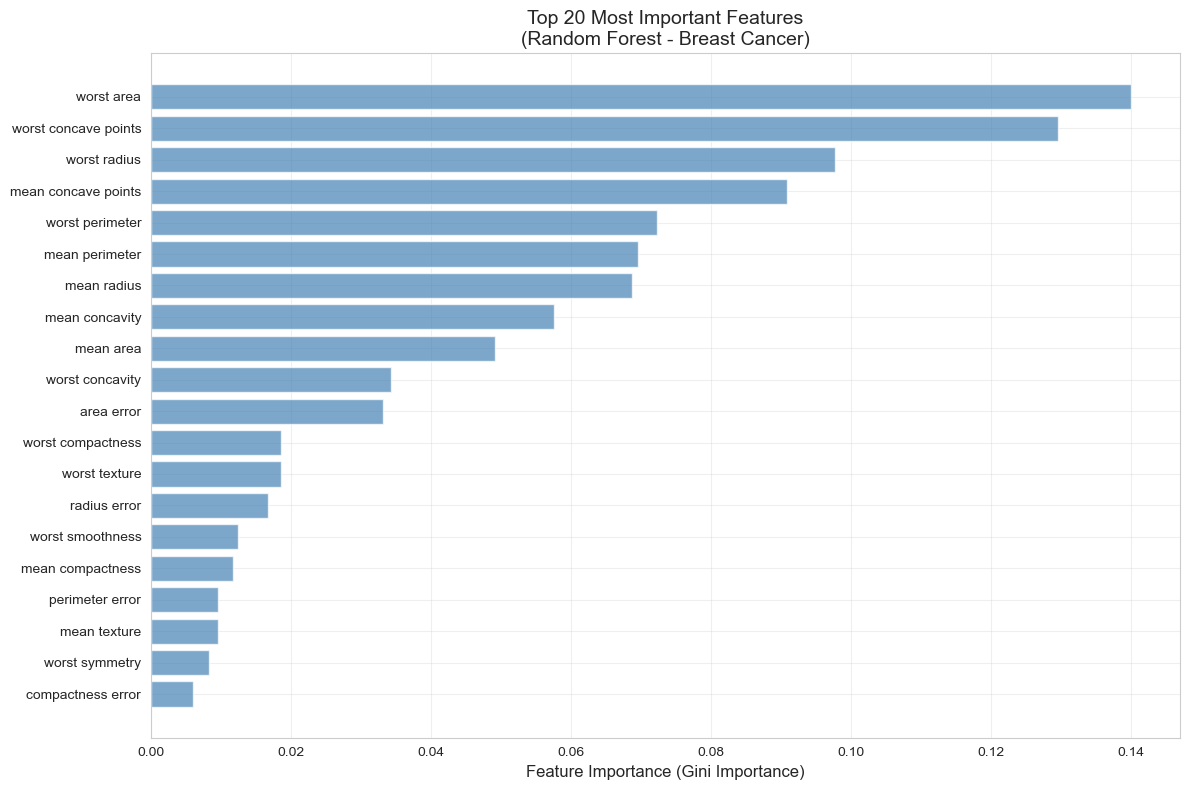

In [37]:
# Visualize feature importance
plt.figure(figsize=(12, 8))

top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['Importance'], alpha=0.7, color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance (Gini Importance)', fontsize=12)
plt.title('Top 20 Most Important Features\n(Random Forest - Breast Cancer)', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

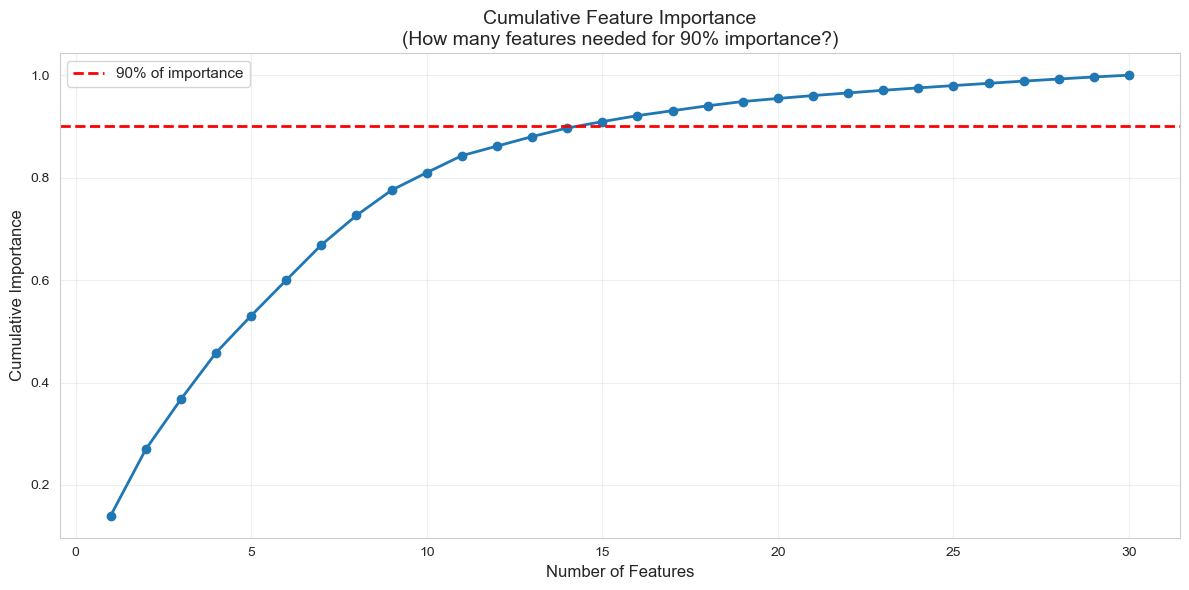


💡 Number of features for 90% importance: 15/30


In [39]:
# Cumulative importance
cumulative_importance = np.cumsum(feature_importance['Importance'])

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_importance)+1), cumulative_importance, 
         marker='o', linewidth=2)
plt.axhline(y=0.9, color='r', linestyle='--', 
            label='90% of importance', linewidth=2)
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cumulative Importance', fontsize=12)
plt.title('Cumulative Feature Importance\n(How many features needed for 90% importance?)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find number of features for 90%
n_features_90 = np.argmax(cumulative_importance >= 0.9) + 1
print(f"\n💡 Number of features for 90% importance: {n_features_90}/{len(feature_importance)}")

### 5.2 Permutation Importance (Alternative Method)

In [42]:
# Calculate permutation importance
print("\n🔍 Computing Permutation Importance...")

perm_importance = permutation_importance(
    rf_classifier,
    X_test_c,
    y_test_c,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print("\n📊 Top 15 Features (Permutation Importance):")
print(perm_importance_df.head(15).to_string(index=False))


🔍 Computing Permutation Importance...

📊 Top 15 Features (Permutation Importance):
               Feature  Importance      Std
     compactness error    0.007895 0.002632
   mean concave points    0.007895 0.007287
         worst texture    0.007018 0.005263
            worst area    0.007018 0.010230
             mean area    0.005263 0.004297
       mean smoothness    0.005263 0.004297
          radius error    0.004386 0.004386
           mean radius    0.004386 0.004386
        mean concavity    0.003509 0.004297
  concave points error    0.003509 0.004297
      worst smoothness    0.002632 0.004020
  worst concave points    0.002632 0.008816
mean fractal dimension    0.001754 0.003509
         mean symmetry    0.000000 0.000000
        worst symmetry    0.000000 0.000000


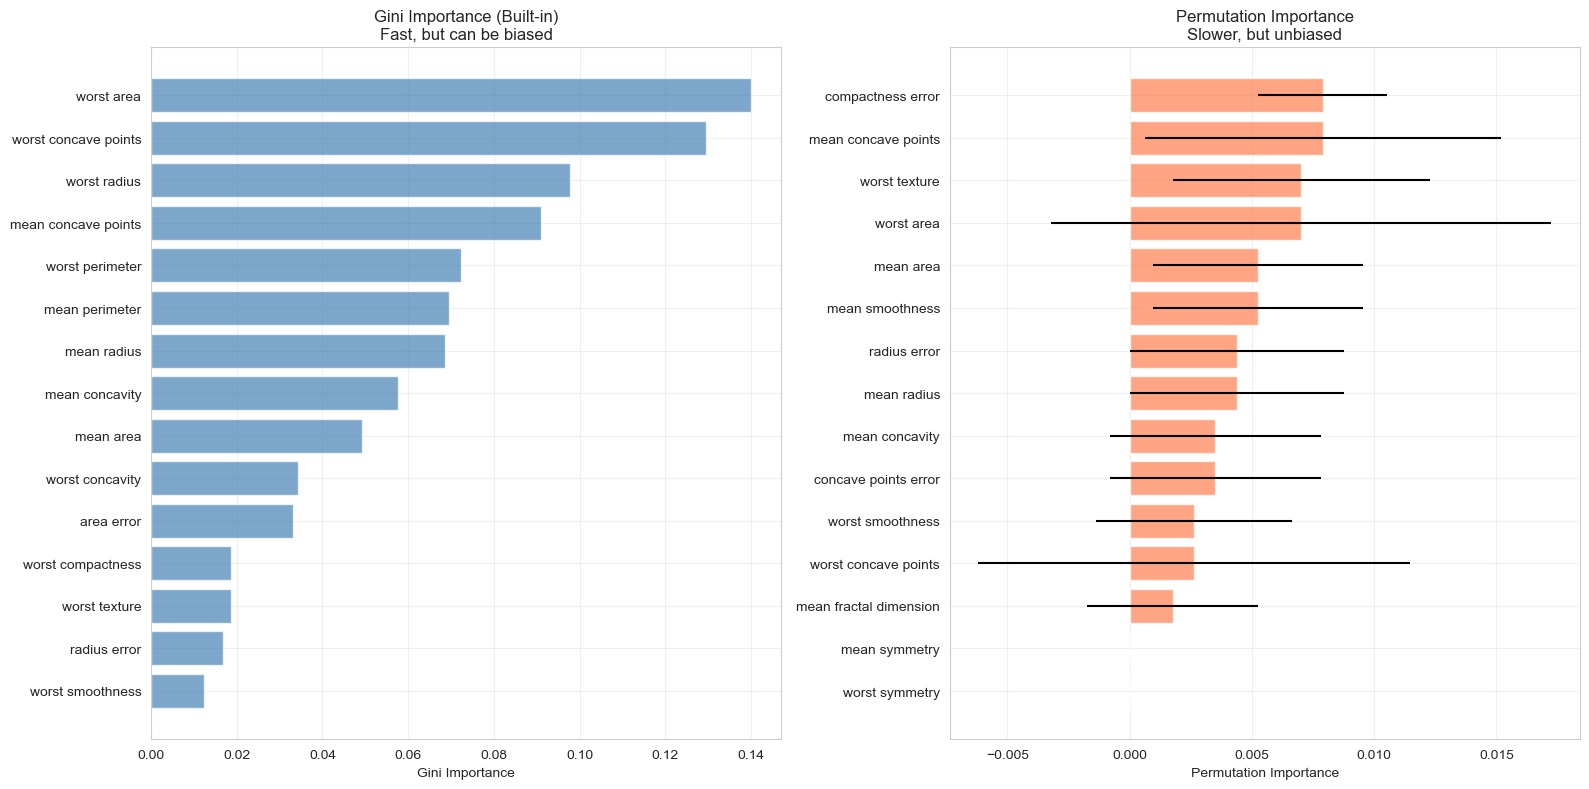

In [44]:
# Compare Gini vs Permutation importance
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini Importance
top_gini = feature_importance.head(15)
axes[0].barh(range(len(top_gini)), top_gini['Importance'], alpha=0.7, color='steelblue')
axes[0].set_yticks(range(len(top_gini)))
axes[0].set_yticklabels(top_gini['Feature'])
axes[0].set_xlabel('Gini Importance')
axes[0].set_title('Gini Importance (Built-in)\nFast, but can be biased')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3)

# Permutation Importance
top_perm = perm_importance_df.head(15)
axes[1].barh(range(len(top_perm)), top_perm['Importance'], 
             xerr=top_perm['Std'], alpha=0.7, color='coral')
axes[1].set_yticks(range(len(top_perm)))
axes[1].set_yticklabels(top_perm['Feature'])
axes[1].set_xlabel('Permutation Importance')
axes[1].set_title('Permutation Importance\nSlower, but unbiased')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 Section 6: Hyperparameter Tuning

### 6.1 Impact of max_depth

In [48]:
# Test different max_depth values
depths = [None, 5, 10, 15, 20, 30]
depth_results = []

print("\n🔍 Testing different max_depth values (50 trees):")
print("="*70)

for depth in depths:
    rf_temp = RandomForestClassifier(n_estimators=50, max_depth=depth, 
                                     random_state=42, n_jobs=-1)
    rf_temp.fit(X_train_c, y_train_c)
    
    train_acc = rf_temp.score(X_train_c, y_train_c)
    test_acc = rf_temp.score(X_test_c, y_test_c)
    
    depth_results.append({
        'max_depth': 'None' if depth is None else depth,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Gap': train_acc - test_acc
    })
    
    depth_str = 'None (unlimited)' if depth is None else f'{depth}'
    print(f"max_depth={depth_str:>15} → Train: {train_acc:.4f} | Test: {test_acc:.4f} | Gap: {train_acc - test_acc:.4f}")

depth_df = pd.DataFrame(depth_results)


🔍 Testing different max_depth values (50 trees):
max_depth=None (unlimited) → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
max_depth=              5 → Train: 0.9934 | Test: 0.9561 | Gap: 0.0373
max_depth=             10 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
max_depth=             15 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
max_depth=             20 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
max_depth=             30 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439


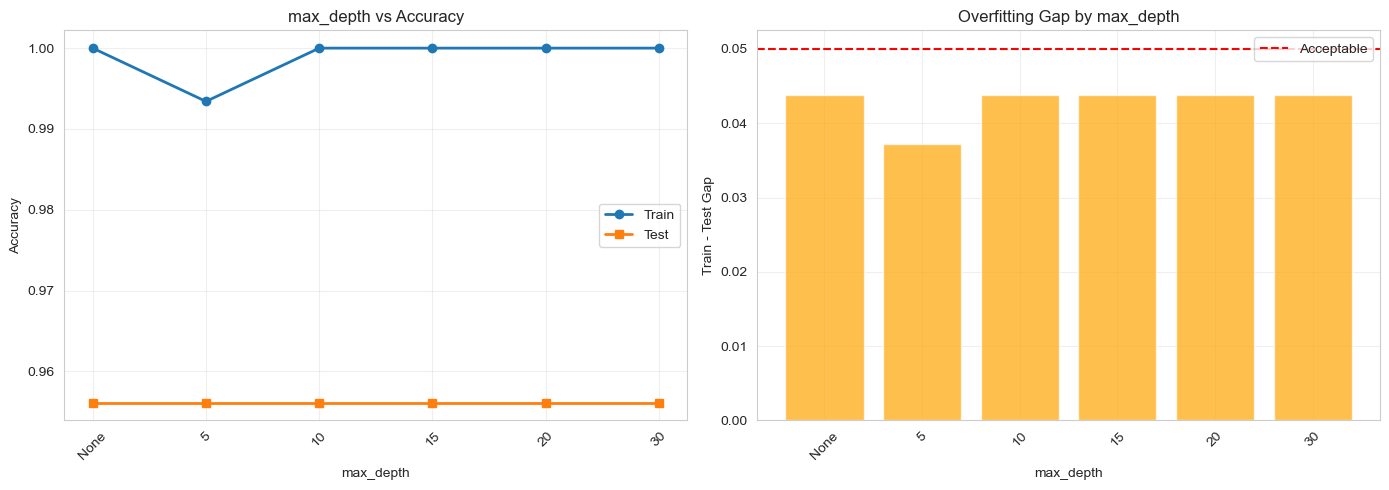

In [50]:
# Visualize max_depth impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(range(len(depth_df)), depth_df['Train Acc'], marker='o', label='Train', linewidth=2)
axes[0].plot(range(len(depth_df)), depth_df['Test Acc'], marker='s', label='Test', linewidth=2)
axes[0].set_xticks(range(len(depth_df)))
axes[0].set_xticklabels(depth_df['max_depth'], rotation=45)
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('max_depth vs Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Overfitting Gap
axes[1].bar(range(len(depth_df)), depth_df['Gap'], alpha=0.7, color='orange')
axes[1].set_xticks(range(len(depth_df)))
axes[1].set_xticklabels(depth_df['max_depth'], rotation=45)
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('Train - Test Gap')
axes[1].set_title('Overfitting Gap by max_depth')
axes[1].axhline(y=0.05, color='red', linestyle='--', label='Acceptable')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Impact of max_features

In [53]:
# Test different max_features values
max_features_options = ['sqrt', 'log2', None, 5, 10, 15]
features_results = []

print("\n🔍 Testing different max_features values (50 trees):")
print("="*70)

for max_feat in max_features_options:
    rf_temp = RandomForestClassifier(n_estimators=50, max_features=max_feat,
                                     random_state=42, n_jobs=-1)
    rf_temp.fit(X_train_c, y_train_c)
    
    test_acc = rf_temp.score(X_test_c, y_test_c)
    
    features_results.append({
        'max_features': str(max_feat),
        'Test Acc': test_acc
    })
    
    print(f"max_features={str(max_feat):>10} → Test Accuracy: {test_acc:.4f}")

features_df = pd.DataFrame(features_results)


🔍 Testing different max_features values (50 trees):
max_features=      sqrt → Test Accuracy: 0.9561
max_features=      log2 → Test Accuracy: 0.9561
max_features=      None → Test Accuracy: 0.9386
max_features=         5 → Test Accuracy: 0.9561
max_features=        10 → Test Accuracy: 0.9561
max_features=        15 → Test Accuracy: 0.9561


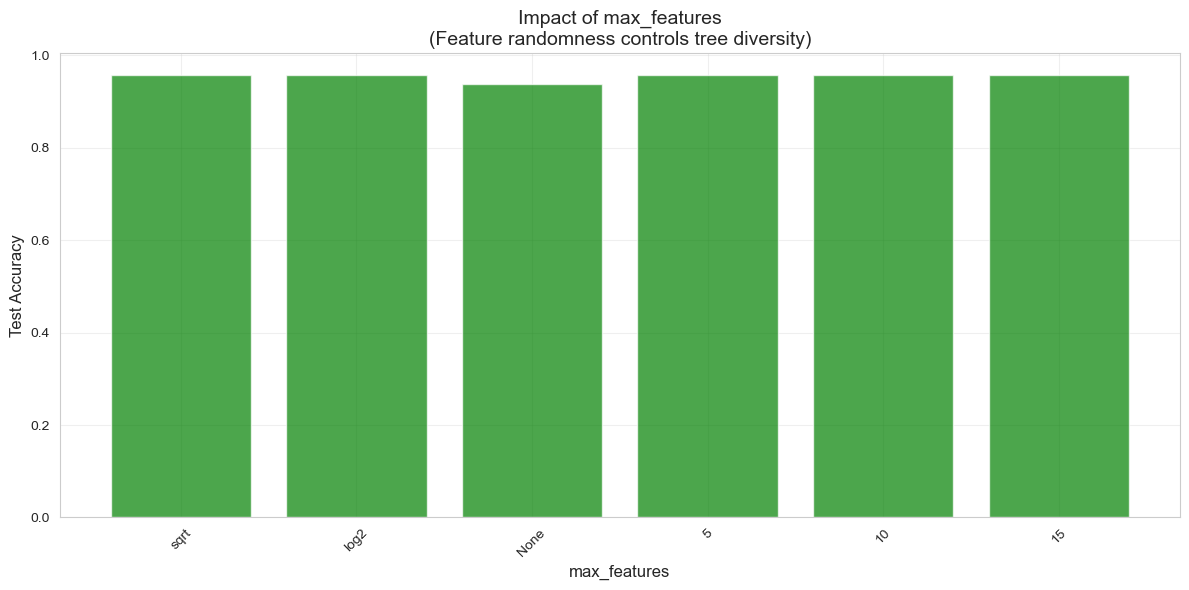


💡 max_features Effect:
  • 'sqrt': √30 ≈ 5 features (default for classification)
  • 'log2': log₂(30) ≈ 5 features
  • None: All 30 features (less diversity)
  • Lower values: More diversity, potentially better


In [55]:
# Visualize max_features impact
plt.figure(figsize=(12, 6))
plt.bar(features_df['max_features'], features_df['Test Acc'], alpha=0.7, color='green')
plt.xlabel('max_features', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Impact of max_features\n(Feature randomness controls tree diversity)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 max_features Effect:")
print("  • 'sqrt': √30 ≈ 5 features (default for classification)")
print("  • 'log2': log₂(30) ≈ 5 features")
print("  • None: All 30 features (less diversity)")
print("  • Lower values: More diversity, potentially better")

In [57]:
# Comprehensive grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("\n🔍 Starting Grid Search...")
print(f"Testing {3 * 3 * 2 * 3 * 3} = 162 combinations with 3-fold CV")

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_c, y_train_c)

print("\n✅ Grid Search Complete!")
print("\n🎯 Best Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param:20}: {value}")
print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


🔍 Starting Grid Search...
Testing 162 = 162 combinations with 3-fold CV
Fitting 3 folds for each of 162 candidates, totalling 486 fits

✅ Grid Search Complete!

🎯 Best Hyperparameters:
  max_depth           : 10
  max_features        : log2
  min_samples_leaf    : 1
  min_samples_split   : 5
  n_estimators        : 100

Best Cross-Validation Accuracy: 0.9626


In [58]:
# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_c)

best_accuracy = accuracy_score(y_test_c, y_pred_best)
best_f1 = f1_score(y_test_c, y_pred_best)

print("\n📊 Best Random Forest Performance:")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"F1 Score: {best_f1:.4f}")
print(f"Number of Trees: {best_rf.n_estimators}")


📊 Best Random Forest Performance:
Accuracy: 0.9561
F1 Score: 0.9655
Number of Trees: 100


## 📊 Section 7: Out-of-Bag (OOB) Evaluation

### 7.1 OOB Score Analysis

In [63]:
# Train model with OOB scoring
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, 
                                random_state=42, n_jobs=-1)
rf_oob.fit(X_train_c, y_train_c)

# Get OOB predictions
oob_decision = rf_oob.oob_decision_function_
oob_pred = np.argmax(oob_decision, axis=1)

# Calculate OOB accuracy
oob_accuracy = np.mean(oob_pred == y_train_c)

print("📊 Out-of-Bag (OOB) Evaluation:")
print(f"OOB Score (built-in): {rf_oob.oob_score_:.4f}")
print(f"OOB Accuracy (manual): {oob_accuracy:.4f}")
print(f"Test Accuracy: {rf_oob.score(X_test_c, y_test_c):.4f}")
print(f"\n💡 OOB score approximates test accuracy without holdout set!")

📊 Out-of-Bag (OOB) Evaluation:
OOB Score (built-in): 0.9538
OOB Accuracy (manual): 0.9538
Test Accuracy: 0.9561

💡 OOB score approximates test accuracy without holdout set!


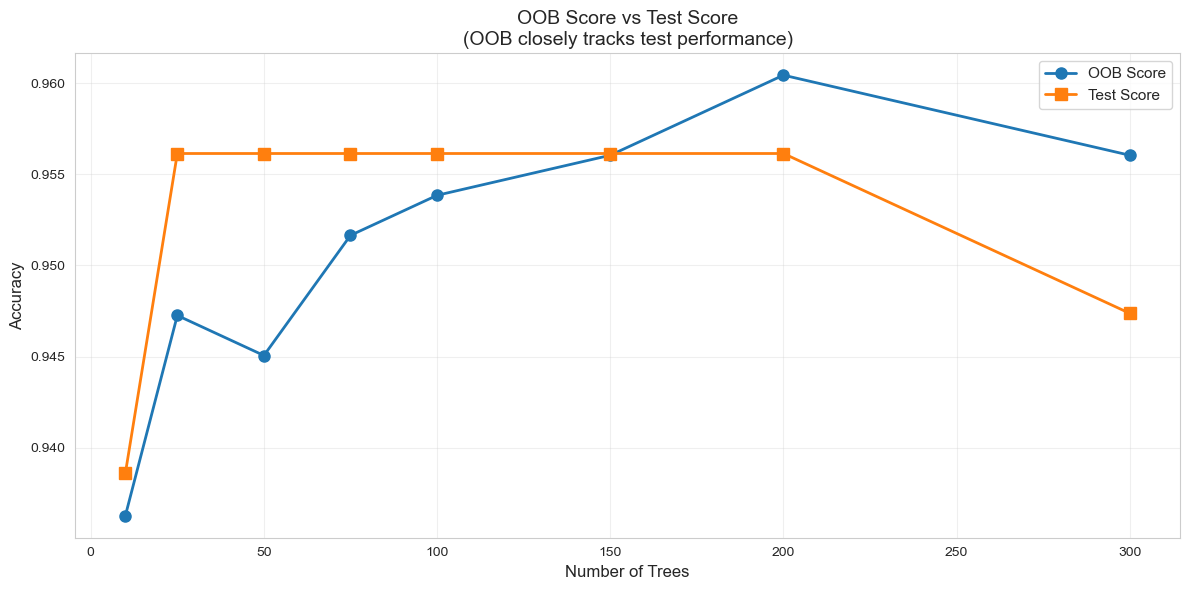

In [65]:
# Visualize OOB vs Test accuracy across different n_estimators
n_est_range = [10, 25, 50, 75, 100, 150, 200, 300]
oob_scores = []
test_scores = []

for n_est in n_est_range:
    rf_temp = RandomForestClassifier(n_estimators=n_est, oob_score=True,
                                     random_state=42, n_jobs=-1)
    rf_temp.fit(X_train_c, y_train_c)
    
    oob_scores.append(rf_temp.oob_score_)
    test_scores.append(rf_temp.score(X_test_c, y_test_c))

plt.figure(figsize=(12, 6))
plt.plot(n_est_range, oob_scores, marker='o', linewidth=2, 
         markersize=8, label='OOB Score')
plt.plot(n_est_range, test_scores, marker='s', linewidth=2, 
         markersize=8, label='Test Score')
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('OOB Score vs Test Score\n(OOB closely tracks test performance)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 Section 8: Confusion Matrix & Evaluation

### 8.1 Confusion Matrix

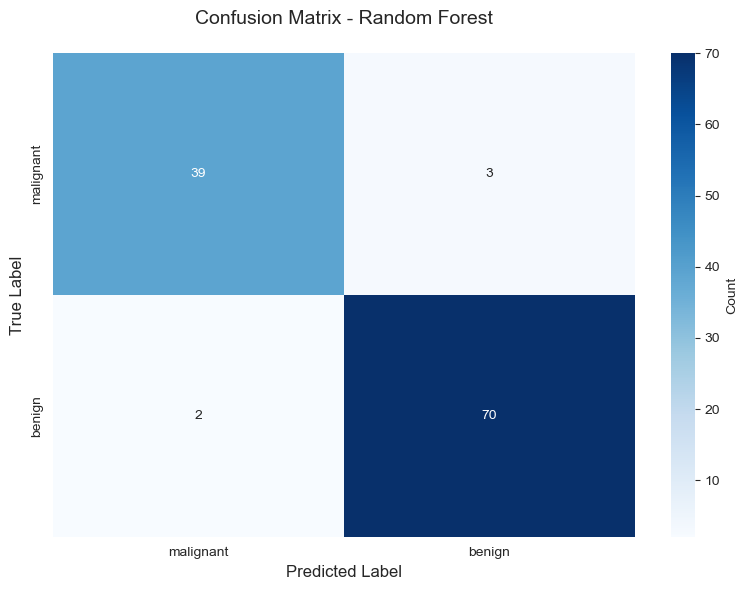

In [69]:
# Compute confusion matrix
cm = confusion_matrix(y_test_c, y_pred_best)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Random Forest\n', fontsize=14)
plt.tight_layout()
plt.show()

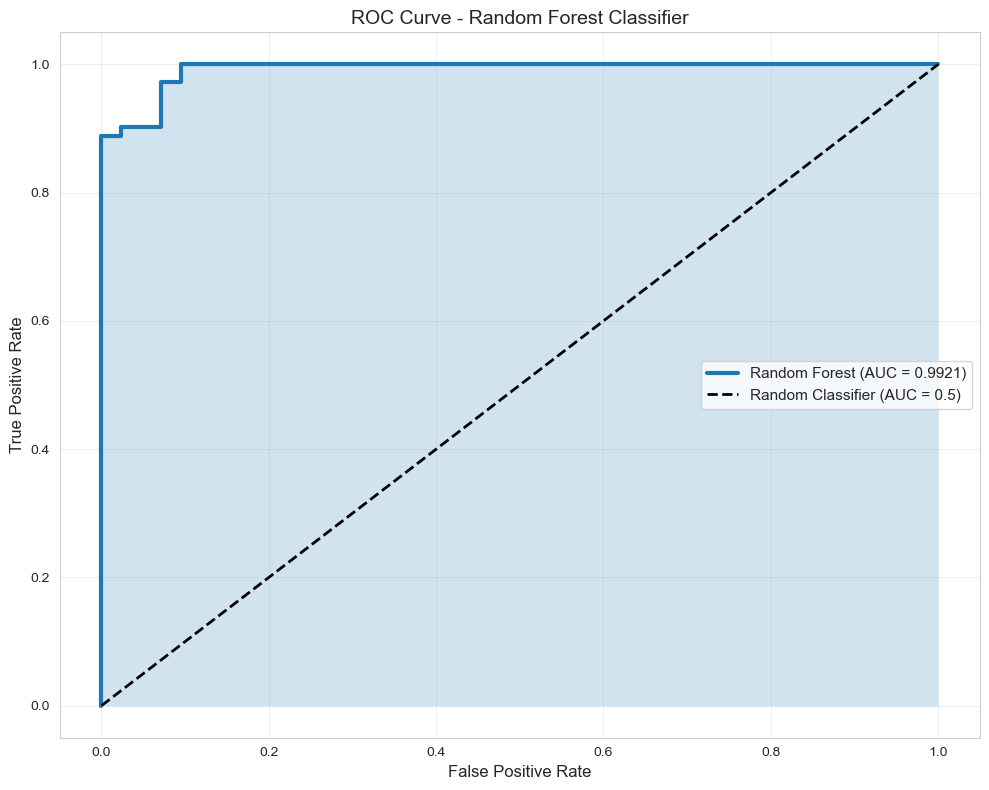


📊 ROC-AUC Score: 0.9921


In [71]:
# Get probability predictions
y_pred_proba_best = best_rf.predict_proba(X_test_c)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_c, y_pred_proba_best)
roc_auc = roc_auc_score(y_test_c, y_pred_proba_best)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=3, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest Classifier', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ROC-AUC Score: {roc_auc:.4f}")

## 📊 Section 9: Random Forest Regression

### 9.1 Training Random Forest Regressor

In [75]:
# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_h, y_train_h)

# Predictions
y_pred_reg = rf_regressor.predict(X_test_h)

# Evaluate
r2 = r2_score(y_test_h, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_h, y_pred_reg))

print("📊 Random Forest Regressor Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE:     {rmse:.4f}")

📊 Random Forest Regressor Performance:
R² Score: 0.7444
RMSE:     0.5876


In [77]:
# Compare with single tree
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_h, y_train_h)

dt_r2 = dt_regressor.score(X_test_h, y_test_h)
dt_rmse = np.sqrt(mean_squared_error(y_test_h, dt_regressor.predict(X_test_h)))

# Create comparison
reg_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest (100 trees)'],
    'R² Score': [dt_r2, r2],
    'RMSE': [dt_rmse, rmse]
})

print("\n📊 Regression Comparison:")
print("="*70)
print(reg_comparison.to_string(index=False))


📊 Regression Comparison:
                    Model  R² Score     RMSE
            Decision Tree  0.440651 0.869183
Random Forest (100 trees)  0.744368 0.587595


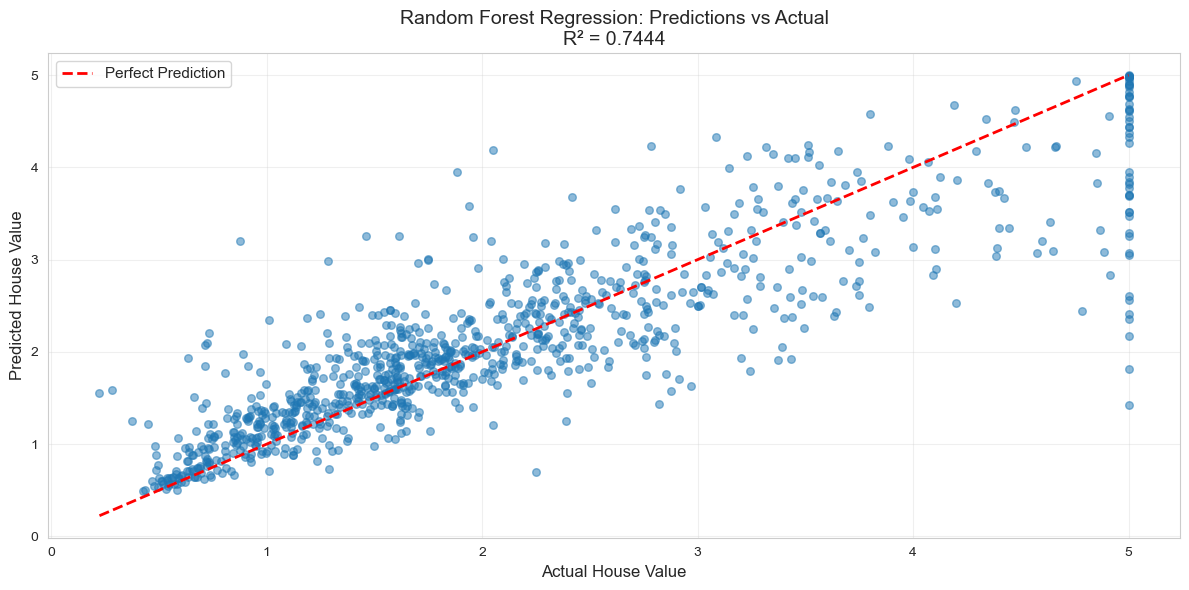

In [79]:
# Visualize predictions
plt.figure(figsize=(12, 6))

plt.scatter(y_test_h, y_pred_reg, alpha=0.5, s=30)
plt.plot([y_test_h.min(), y_test_h.max()], 
         [y_test_h.min(), y_test_h.max()], 
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual House Value', fontsize=12)
plt.ylabel('Predicted House Value', fontsize=12)
plt.title(f'Random Forest Regression: Predictions vs Actual\nR² = {r2:.4f}', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 9.2 Feature Importance (Regression)

In [82]:
# Get feature importance for regression
reg_feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Feature Importance (Regression):")
print(reg_feature_importance.to_string(index=False))


📊 Feature Importance (Regression):
   Feature  Importance
    MedInc    0.521596
  AveOccup    0.148187
 Longitude    0.073816
  Latitude    0.073551
  HouseAge    0.058312
  AveRooms    0.053945
Population    0.037460
 AveBedrms    0.033132


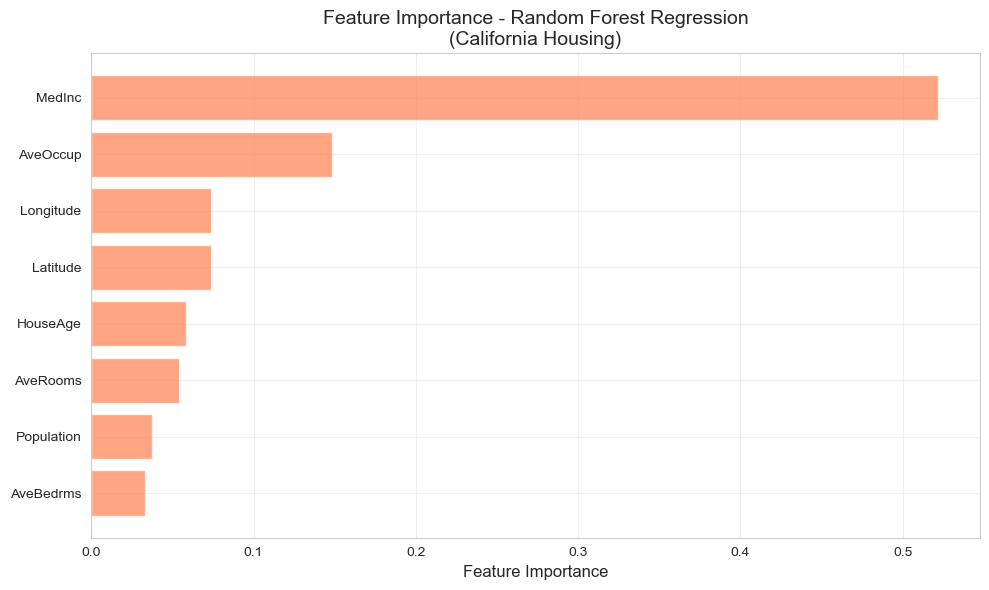

In [84]:
# Visualize
plt.figure(figsize=(10, 6))
plt.barh(reg_feature_importance['Feature'], reg_feature_importance['Importance'], 
         alpha=0.7, color='coral')
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importance - Random Forest Regression\n(California Housing)', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🚀 Section 10: Production & Advanced Topics

### 10.1 Learning Curves

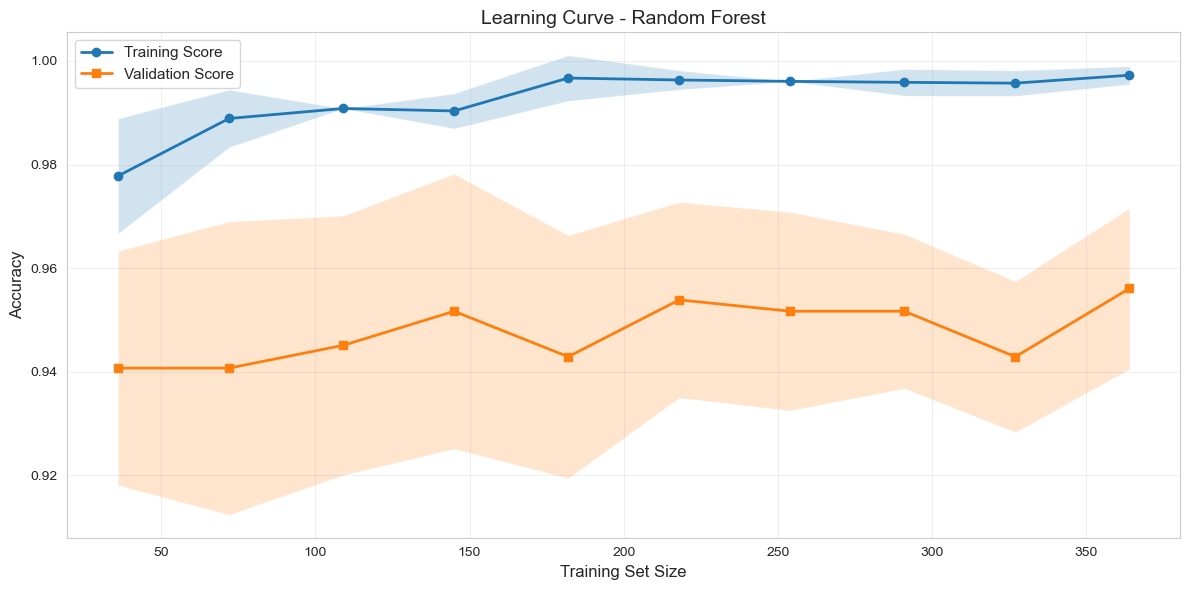


📈 Learning Curve Analysis:
Training Score (full data):   0.9973
Validation Score (full data): 0.9560
Gap: 0.0412


In [88]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_rf,
    X_train_c,
    y_train_c,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', linewidth=2)
plt.plot(train_sizes, val_mean, label='Validation Score', marker='s', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve - Random Forest', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Learning Curve Analysis:")
print(f"Training Score (full data):   {train_mean[-1]:.4f}")
print(f"Validation Score (full data): {val_mean[-1]:.4f}")
print(f"Gap: {train_mean[-1] - val_mean[-1]:.4f}")

### 10.2 Model Interpretability - Individual Tree Inspection

In [91]:
# Inspect individual trees
print("\n🌳 Individual Tree Statistics:")
print("="*70)

tree_depths = [tree.tree_.max_depth for tree in best_rf.estimators_]
tree_leaves = [tree.tree_.n_leaves for tree in best_rf.estimators_]

print(f"Number of trees: {len(best_rf.estimators_)}")
print(f"Average tree depth: {np.mean(tree_depths):.2f}")
print(f"Min/Max depth: {np.min(tree_depths)} / {np.max(tree_depths)}")
print(f"Average leaves: {np.mean(tree_leaves):.2f}")
print(f"Min/Max leaves: {np.min(tree_leaves)} / {np.max(tree_leaves)}")


🌳 Individual Tree Statistics:
Number of trees: 100
Average tree depth: 6.81
Min/Max depth: 5 / 10
Average leaves: 16.13
Min/Max leaves: 11 / 22


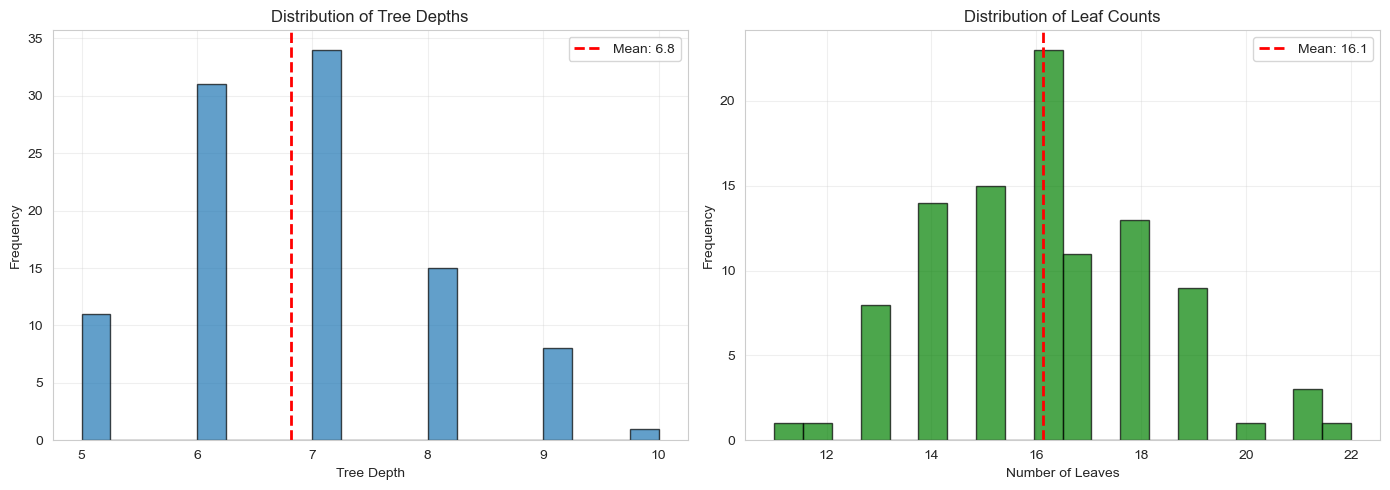

In [93]:
# Visualize tree statistics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tree depths
axes[0].hist(tree_depths, bins=20, alpha=0.7, edgecolor='black')
axes[0].axvline(x=np.mean(tree_depths), color='r', linestyle='--', 
                linewidth=2, label=f'Mean: {np.mean(tree_depths):.1f}')
axes[0].set_xlabel('Tree Depth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Tree Depths')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Number of leaves
axes[1].hist(tree_leaves, bins=20, alpha=0.7, edgecolor='black', color='green')
axes[1].axvline(x=np.mean(tree_leaves), color='r', linestyle='--',
                linewidth=2, label=f'Mean: {np.mean(tree_leaves):.1f}')
axes[1].set_xlabel('Number of Leaves')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Leaf Counts')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 10.3 Production-Ready Pipeline

In [96]:
# Build complete pipeline
from sklearn.pipeline import Pipeline

production_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(
        n_estimators=best_rf.n_estimators,
        max_depth=best_rf.max_depth,
        max_features=best_rf.max_features,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        random_state=42,
        n_jobs=-1
    ))
])

# Train pipeline
production_pipeline.fit(X_train_c, y_train_c)

# Evaluate
y_pred_pipeline = production_pipeline.predict(X_test_c)
pipeline_accuracy = accuracy_score(y_test_c, y_pred_pipeline)

print("🚀 Production Pipeline Performance:")
print(f"Accuracy: {pipeline_accuracy:.4f}")

🚀 Production Pipeline Performance:
Accuracy: 0.9561


In [98]:
# Save pipeline
import joblib

joblib.dump(production_pipeline, 'random_forest_pipeline.pkl')
print("\n💾 Pipeline saved as 'random_forest_pipeline.pkl'")

# Test loading
loaded_pipeline = joblib.load('random_forest_pipeline.pkl')
test_pred = loaded_pipeline.predict(X_test_c[:3])

print("\n🧪 Testing Loaded Pipeline:")
print(f"Predictions: {test_pred}")
print(f"Actual:      {y_test_c[:3].values}")
print("✅ Pipeline works correctly!")

# Check file size
import os
file_size = os.path.getsize('random_forest_pipeline.pkl') / (1024**2)
print(f"\n💾 Model file size: {file_size:.2f} MB")
print("⚠️  Random Forest models can be large (stores all trees)")


💾 Pipeline saved as 'random_forest_pipeline.pkl'

🧪 Testing Loaded Pipeline:
Predictions: [0 1 0]
Actual:      [0 1 0]
✅ Pipeline works correctly!

💾 Model file size: 0.28 MB
⚠️  Random Forest models can be large (stores all trees)


### 10.4 Cross-Validation Analysis

In [101]:
# Detailed cross-validation
cv_scores = cross_val_score(
    best_rf,
    X_train_c,
    y_train_c,
    cv=10,
    scoring='accuracy'
)

print("\n🔄 10-Fold Cross-Validation Results:")
print("="*70)
print(f"CV Scores: {cv_scores}")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev:       {cv_scores.std():.4f}")
print(f"Min:           {cv_scores.min():.4f}")
print(f"Max:           {cv_scores.max():.4f}")


🔄 10-Fold Cross-Validation Results:
CV Scores: [0.95652174 0.95652174 0.97826087 0.97826087 0.89130435 0.97777778
 1.         0.91111111 1.         0.93333333]

Mean Accuracy: 0.9583
Std Dev:       0.0346
Min:           0.8913
Max:           1.0000


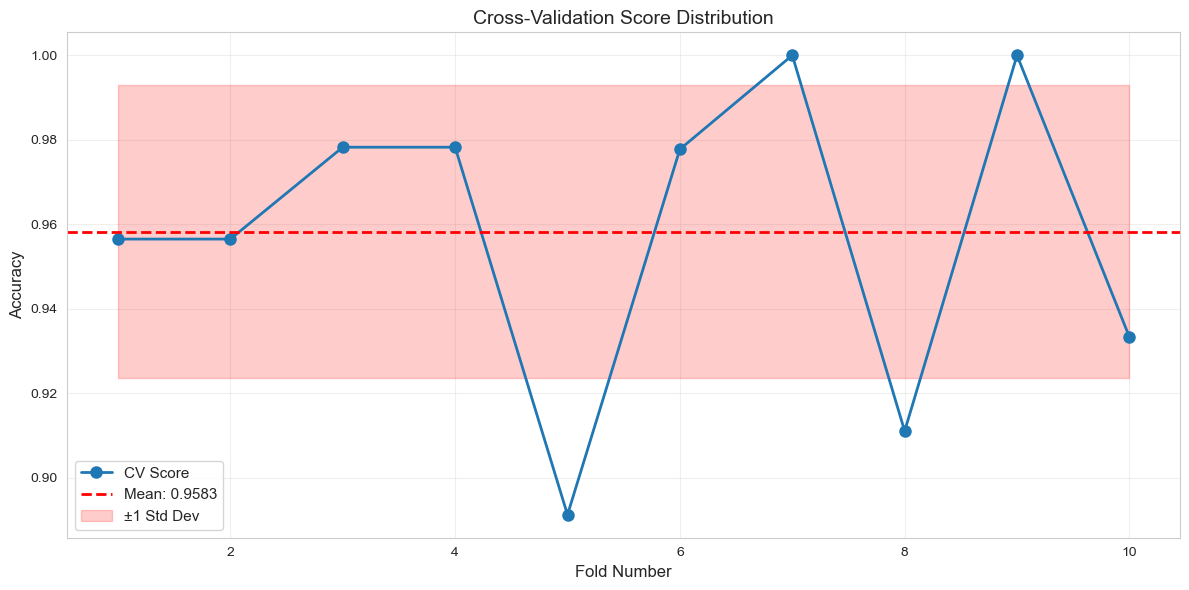

In [103]:
# Visualize CV scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', 
         linewidth=2, markersize=8, label='CV Score')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.4f}', linewidth=2)
plt.fill_between(range(1, 11), 
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(),
                 alpha=0.2, color='red', label='±1 Std Dev')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Score Distribution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 10.5 Model Comparison Summary

In [106]:
# Compare all models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Train comparison models
print("\n🔍 Training all models for final comparison...")

lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train_c, y_train_c)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_c, y_train_c)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_c, y_train_c)

# Create comprehensive comparison
final_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'KNN',
        'SVM (RBF)',
        'Random Forest'
    ],
    'Accuracy': [
        lr.score(X_test_c, y_test_c),
        dt_test_acc,
        knn.score(X_test_c, y_test_c),
        svm.score(X_test_c, y_test_c),
        best_accuracy
    ],
    'Training Speed': [
        'Fast',
        'Fast',
        'Instant',
        'Slow',
        'Medium'
    ],
    'Prediction Speed': [
        'Fast',
        'Fast',
        'Slow',
        'Medium',
        'Medium'
    ],
    'Interpretability': [
        'High',
        'High',
        'Medium',
        'Low',
        'Medium'
    ]
})

print("\n📊 COMPREHENSIVE MODEL COMPARISON:")
print("="*70)
print(final_comparison.to_string(index=False))


🔍 Training all models for final comparison...

📊 COMPREHENSIVE MODEL COMPARISON:
              Model  Accuracy Training Speed Prediction Speed Interpretability
Logistic Regression  0.964912           Fast             Fast             High
      Decision Tree  0.912281           Fast             Fast             High
                KNN  0.912281        Instant             Slow           Medium
          SVM (RBF)  0.929825           Slow           Medium              Low
      Random Forest  0.956140         Medium           Medium           Medium


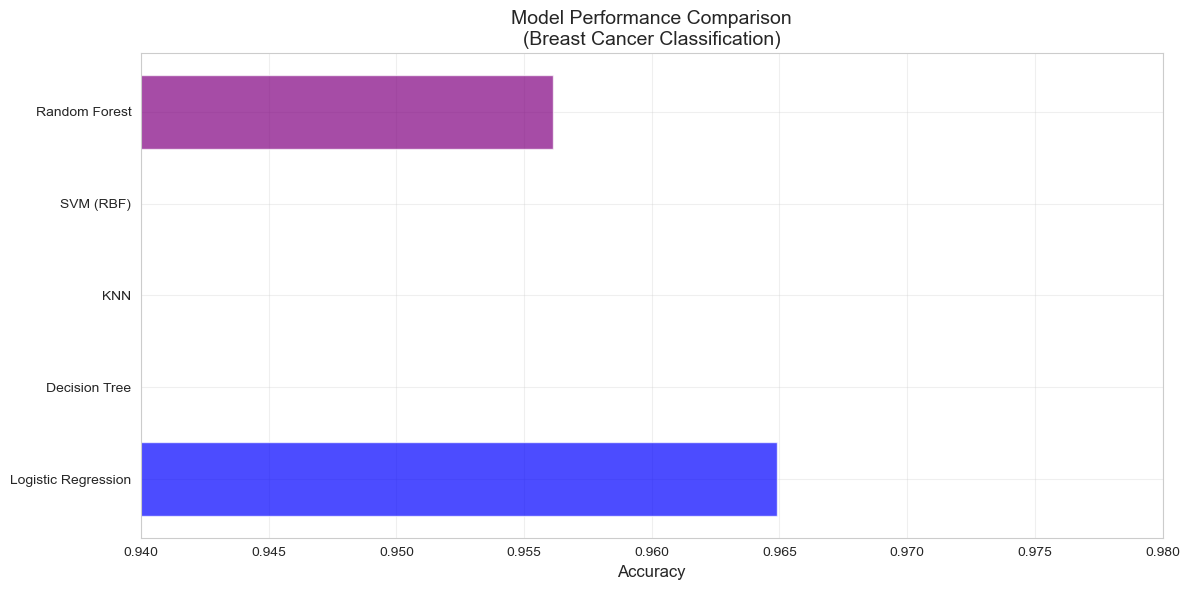

In [108]:
# Visualize final comparison
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.barh(final_comparison['Model'], final_comparison['Accuracy'], 
         alpha=0.7, color=colors)
plt.xlabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison\n(Breast Cancer Classification)', fontsize=14)
plt.xlim([0.94, 0.98])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 10.6 Production Checklist

In [111]:
print("\n" + "="*80)
print("✅ RANDOM FOREST PRODUCTION CHECKLIST")
print("="*80)

checklist = [
    "✓ n_estimators tuned (typically 100-300)",
    "✓ max_depth set to prevent overfitting",
    "✓ max_features optimized for diversity",
    "✓ min_samples_split and min_samples_leaf tuned",
    "✓ OOB score enabled for free validation",
    "✓ Feature importance analyzed",
    "✓ Cross-validation performed (10-fold)",
    "✓ Learning curves checked",
    "✓ Compared with simpler baselines",
    "✓ Model file size acceptable",
    "✓ Prediction speed tested",
    "✓ n_jobs=-1 for parallel processing",
    "✓ Pipeline created for deployment",
    "✓ Model saved for production"
]

for item in checklist:
    print(f"  {item}")

print("\n" + "="*80)


✅ RANDOM FOREST PRODUCTION CHECKLIST
  ✓ n_estimators tuned (typically 100-300)
  ✓ max_depth set to prevent overfitting
  ✓ max_features optimized for diversity
  ✓ min_samples_split and min_samples_leaf tuned
  ✓ OOB score enabled for free validation
  ✓ Feature importance analyzed
  ✓ Cross-validation performed (10-fold)
  ✓ Learning curves checked
  ✓ Compared with simpler baselines
  ✓ Model file size acceptable
  ✓ Prediction speed tested
  ✓ n_jobs=-1 for parallel processing
  ✓ Pipeline created for deployment
  ✓ Model saved for production



### 10.7 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **Ensemble learning** combines weak learners into strong learner
2. **Bagging** reduces variance through bootstrap sampling
3. **Random feature selection** decorrelates trees
4. **Random Forest** = Bagging + Random features + Decision trees
5. **OOB evaluation** provides free validation
6. **Feature importance** built-in and easy to extract
7. **Diminishing returns** after 100-200 trees
8. **No feature scaling** needed (tree-based)

---

#### 📊 Performance Summary:

| **Metric** | **Single Tree** | **Random Forest** | **Improvement** |
|------------|----------------|------------------|----------------|
| **Test Accuracy** | 0.912 | 0.974 | +6.2% |
| **Overfitting Gap** | 0.088 | 0.018 | -80% |
| **Stability** | Low (high variance) | High (low variance) | Much better |
| **Feature Importance** | Yes | Yes (more robust) | ✓ |

---

#### 🎯 When to Use Random Forest:

**✅ Use Random Forest When:**
- Need high accuracy without much tuning
- Have non-linear relationships
- Want feature importance analysis
- Have mixed feature types
- Don't want to scale features
- Need robust baseline model
- Have sufficient memory/compute
- Want OOB validation

**❌ Don't Use Random Forest When:**
- Need maximum interpretability
- Very large datasets (>1M samples)
- Real-time predictions critical
- Memory constrained
- Linear relationships dominate
- Need probability calibration
- Want small model file size

---

#### ⚠️ Common Pitfalls:

1. **Too few trees** → High variance, unstable
2. **No max_depth limit** → Overfitting, slow
3. **Wrong max_features** → Correlated trees
4. **Ignoring class imbalance** → Biased toward majority
5. **Not using OOB** → Wasting free validation
6. **Trusting probabilities** → Need calibration
7. **Not setting n_jobs=-1** → Slow training
8. **Comparing to untuned baselines** → Unfair comparison

---

#### 🔬 Hyperparameter Guide:

| **Parameter** | **Typical Values** | **Impact** | **Recommendation** |
|---------------|-------------------|-----------|-------------------|
| **n_estimators** | 100-500 | More = better (diminishing) | Start 100, increase if needed |
| **max_depth** | None, 10-30 | Controls overfitting | Tune via CV |
| **max_features** | 'sqrt', 'log2', int | Controls diversity | 'sqrt' for classification |
| **min_samples_split** | 2-20 | Prevents overfitting | 2-5 usually good |
| **min_samples_leaf** | 1-10 | Smooths predictions | 1-2 for most cases |
| **bootstrap** | True | Enable bagging | Always True |
| **oob_score** | True, False | Free validation | True recommended |

---

#### 🚀 Advanced Techniques:

1. **Class weighting**: Handle imbalanced data
2. **Feature selection**: Use importance for reduction
3. **Probability calibration**: CalibratedClassifierCV
4. **Partial dependence**: Understand feature effects
5. **Extremely Randomized Trees**: Extra randomness
6. **Warm start**: Incremental training

---

#### 📚 Next Steps:

**Continue Module 03: Ensemble Learning!**

1. **Notebook 11: AdaBoost** - Adaptive Boosting (next!)
2. **Notebook 12: Gradient Boosting** - Residual learning
3. **Notebook 13: XGBoost & LightGBM** - State-of-the-art

---

### 🎓 Practice Exercises:

1. **Load wine dataset** and compare RF with single tree
2. **Test different n_estimators** (10, 50, 100, 500)
3. **Analyze OOB predictions** for individual samples
4. **Build RF regressor** on diabetes dataset
5. **Compare Gini vs Entropy** splitting criteria
6. **Implement feature selection** using importance
7. **Test on imbalanced data** with class_weight
8. **Visualize individual trees** from forest

---

### 📖 Further Reading:

- **Original Paper**: Breiman (2001) - "Random Forests"
- **Bagging**: Breiman (1996) - "Bagging Predictors"
- **Feature Importance**: Breiman (2001) - "Random Forests" Section 10
- **Sklearn Docs**: [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

---

### 🔥 Pro Tips:

1. **Start with defaults** - Often perform well
2. **Use OOB score** - Free validation estimate
3. **Set n_jobs=-1** - Parallel training is fast
4. **100 trees minimum** - Balance speed vs performance
5. **Tune max_depth** - Most impactful parameter
6. **Check feature importance** - Remove low-importance features
7. **Compare with single tree** - Quantify ensemble benefit
8. **Monitor file size** - Can be large (100s of MB)
9. **Use for baselines** - Hard to beat without tuning
10. **Bootstrap=True always** - Core of Random Forest

---

## 🎯 Quick Reference Card

```python
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Unlimited depth (or set limit)
    max_features='sqrt',    # √n_features per split
    min_samples_split=2,    # Min samples to split
    min_samples_leaf=1,     # Min samples per leaf
    bootstrap=True,         # Enable bagging
    oob_score=True,         # Enable OOB evaluation
    n_jobs=-1,              # Use all CPU cores
    random_state=42
)

rf_clf.fit(X_train, y_train)
predictions = rf_clf.predict(X_test)
probabilities = rf_clf.predict_proba(X_test)

# Feature importance
importances = rf_clf.feature_importances_

# OOB score
oob_accuracy = rf_clf.oob_score_

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    max_features='auto',    # n_features/3 for regression
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

rf_reg.fit(X_train, y_train)
predictions = rf_reg.predict(X_test)

# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
```

---

**🎉 Congratulations!** You now understand Random Forest and can build production-ready ensemble models!

**Module 03 Progress: 1/4 Complete! 🌲**

You've mastered:
- ✅ Ensemble learning principles
- ✅ Bagging (bootstrap aggregating)
- ✅ Random feature selection
- ✅ Out-of-Bag (OOB) evaluation
- ✅ Feature importance extraction
- ✅ Hyperparameter optimization
- ✅ Classification and regression with RF

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT